# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
from datetime import date


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:

mainurl = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 


citydata = []


print("Beginning Data Retrieval     ")
print("-----------------------------")


record_count = 1
set_count = 1


for i, city in enumerate(cities):
        

    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

  
    city_url = mainurl + "&q=" + city
    

    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))


    record_count += 1

   
    try:

        city_weather = requests.get(city_url).json()


        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        citydata.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})


    except:
        print("City not found. Skipping...")
        pass
              

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | iquique
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | luohe
Processing Record 9 of Set 1 | cabo san lucas
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 14 of Set 1 | santa isabel do rio negro
Processing Record 15 of Set 1 | marawi
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | ancud
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | jarjis
City not found. Skipping...
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | taolanaro
City not found. Skipp

Processing Record 34 of Set 4 | qingdao
Processing Record 35 of Set 4 | haines junction
Processing Record 36 of Set 4 | salinopolis
Processing Record 37 of Set 4 | bathsheba
Processing Record 38 of Set 4 | san cristobal
Processing Record 39 of Set 4 | saskylakh
Processing Record 40 of Set 4 | jalu
Processing Record 41 of Set 4 | el faiyum
City not found. Skipping...
Processing Record 42 of Set 4 | boueni
Processing Record 43 of Set 4 | maple creek
Processing Record 44 of Set 4 | kapoeta
Processing Record 45 of Set 4 | kieta
Processing Record 46 of Set 4 | havoysund
Processing Record 47 of Set 4 | lewisville
Processing Record 48 of Set 4 | amapa
Processing Record 49 of Set 4 | fort nelson
Processing Record 0 of Set 5 | dolores
Processing Record 1 of Set 5 | oga
Processing Record 2 of Set 5 | uk
City not found. Skipping...
Processing Record 3 of Set 5 | dudinka
Processing Record 4 of Set 5 | chokurdakh
Processing Record 5 of Set 5 | deputatskiy
Processing Record 6 of Set 5 | zwedru
Proce

Processing Record 25 of Set 8 | deh rawud
City not found. Skipping...
Processing Record 26 of Set 8 | kytlym
City not found. Skipping...
Processing Record 27 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 28 of Set 8 | calvinia
Processing Record 29 of Set 8 | tambura
Processing Record 30 of Set 8 | turukhansk
Processing Record 31 of Set 8 | forrest city
Processing Record 32 of Set 8 | atakpame
Processing Record 33 of Set 8 | warrnambool
Processing Record 34 of Set 8 | mtwara
Processing Record 35 of Set 8 | susanville
Processing Record 36 of Set 8 | san rafael del sur
Processing Record 37 of Set 8 | kapit
Processing Record 38 of Set 8 | kruisfontein
Processing Record 39 of Set 8 | saint-augustin
Processing Record 40 of Set 8 | lashio
Processing Record 41 of Set 8 | klagenfurt
Processing Record 42 of Set 8 | savannah bight
Processing Record 43 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 44 of Set 8 | devonport
Processing Record 45 of Set 8 | arvika
Processin

City not found. Skipping...
Processing Record 7 of Set 12 | ukiah
Processing Record 8 of Set 12 | asfi
Processing Record 9 of Set 12 | nanyang
Processing Record 10 of Set 12 | muros
Processing Record 11 of Set 12 | karanganom
Processing Record 12 of Set 12 | la baule-escoublac
Processing Record 13 of Set 12 | vallenar
Processing Record 14 of Set 12 | burnie
Processing Record 15 of Set 12 | neiafu
Processing Record 16 of Set 12 | jining
Processing Record 17 of Set 12 | brokopondo
Processing Record 18 of Set 12 | donegal
Processing Record 19 of Set 12 | omsukchan
Processing Record 20 of Set 12 | ust-maya
Processing Record 21 of Set 12 | kokkola
Processing Record 22 of Set 12 | codigoro
Processing Record 23 of Set 12 | praia da vitoria
Processing Record 24 of Set 12 | kisangani
Processing Record 25 of Set 12 | raahe
Processing Record 26 of Set 12 | khilok
Processing Record 27 of Set 12 | okhotsk
Processing Record 28 of Set 12 | tiarei
Processing Record 29 of Set 12 | prieska
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
citydata_pd = pd.DataFrame(citydata)
citydata_pd.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [31]:
citydata_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,upernavik,72.7868,-56.1549,49.10,75,98,8.81,GL,1627440266
1,iquique,-20.2208,-70.1431,59.04,74,22,4.03,CL,1627440864
2,avarua,-21.2078,-159.7750,77.05,65,21,4.61,CK,1627440269
3,port alfred,-33.5906,26.8910,60.28,83,11,14.32,ZA,1627440285
4,rikitea,-23.1203,-134.9692,74.21,79,100,15.30,PF,1627440270


In [32]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,19.252348,20.043268,69.442787,71.477352,55.189895,7.789477,1.627440e+09
std,32.865281,87.769651,14.238742,19.234713,39.536633,5.563179,2.045320e+02
min,-54.800000,-175.200000,33.730000,12.000000,0.000000,0.000000,1.627440e+09
25%,-6.872475,-55.395600,59.957500,61.000000,12.250000,3.612500,1.627440e+09
50%,20.616650,24.696800,70.800000,76.000000,66.000000,6.300000,1.627440e+09
75%,46.583850,96.999550,81.590000,86.000000,96.000000,11.175000,1.627440e+09
max,78.218600,178.416700,102.490000,100.000000,100.000000,29.930000,1.627440e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [36]:
humidity_citydata=citydata_pd[(citydata_pd["Humidity"] > 100)].index
humidity_citydata

Int64Index([], dtype='int64')

In [37]:
clean_citydata = citydata_pd.drop(humidity_citydata, inplace=False)
clean_citydata.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,upernavik,72.7868,-56.1549,49.10,75,98,8.81,GL,1627440266
1,iquique,-20.2208,-70.1431,59.04,74,22,4.03,CL,1627440864
2,avarua,-21.2078,-159.7750,77.05,65,21,4.61,CK,1627440269
3,port alfred,-33.5906,26.8910,60.28,83,11,14.32,ZA,1627440285
4,rikitea,-23.1203,-134.9692,74.21,79,100,15.30,PF,1627440270


In [38]:
lats = clean_citydata["Lat"]
max_temps = clean_citydata["Max Temp"]
humidity = clean_citydata["Humidity"]
cloudiness = clean_citydata["Cloudiness"]
wind_speed = clean_citydata["Wind Speed"]

# Export the City_Data into a csv
clean_citydata.to_csv("../output_data/CityData.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

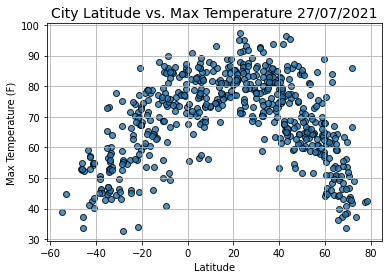

In [40]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
today = (date.today().strftime("%d/%m/%Y"))

# Giving The Title 
plt.title(f"City Latitude vs. Max Temperature {today}", fontsize=14)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid  (True)
# Save The Plot & Show 
plt.savefig("../output_data/Latitude vs. Temperature Plot.png")
plt.show()

## Latitude vs. Humidity Plot

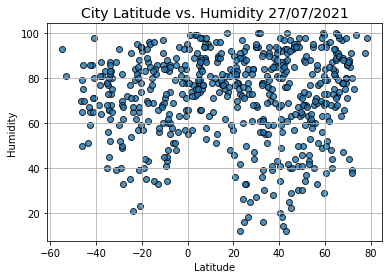

In [41]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

today = (date.today().strftime("%d/%m/%Y"))
# Giving The Title 
plt.title (f"City Latitude vs. Humidity {today}", fontsize=14)
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid  (True)
# Save The Plot & Show 
plt.savefig("../output_data/Latitude vs. Humidity Plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

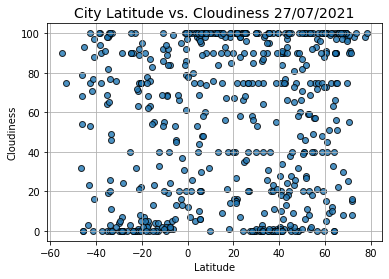

In [42]:
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


# Giving The Title 
plt.title (f"City Latitude vs. Cloudiness {today}", fontsize=14)
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid  (True)
# Save The Plot & Show 
plt.savefig("../output_data/Latitude vs. Cloudiness Plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

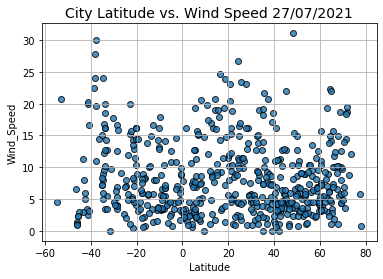

In [43]:
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


# Giving The Title 
plt.title (f"City Latitude vs. Wind Speed {today}", fontsize=14)
plt.ylabel("Wind_Speed")
plt.xlabel("Latitude")
plt.grid  (True)
# Save The Plot & Show 
plt.savefig("../output_data/Latitude vs. Wind Speed Plot.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [67]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [70]:
NorthernHem_df = citydata_pd.loc[(citydata_pd["Lat"] >= 0)]
SouthernHem_df = citydata_pd.loc[(citydata_pd["Lat"] < 0)]

The r-squared is: 0.4027200347485277


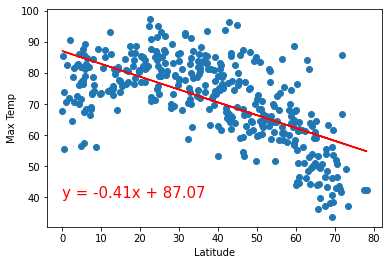

<Figure size 432x288 with 0 Axes>

In [74]:
# Linear regression on Northern Hemisphere
x_values = NorthernHem_df["Lat"]
y_values = NorthernHem_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(0,40))

# Save the figure
plt.savefig("../output_data/Northern Hemisphere Max Temp vs Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5185143819418808


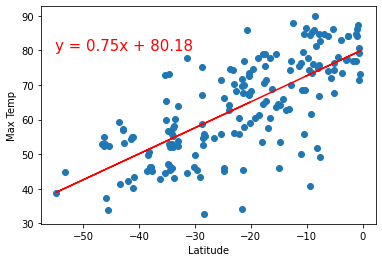

<Figure size 432x288 with 0 Axes>

In [75]:
x_values = SouthernHem_df["Lat"]
y_values = SouthernHem_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 80))
plt.savefig("../output_data/Southern Hemisphere Max Temp vs Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.004443689039086572


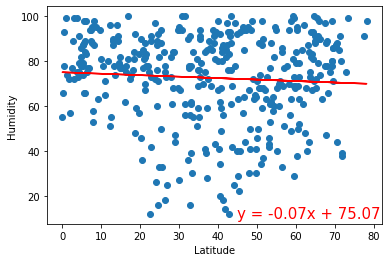

<Figure size 432x288 with 0 Axes>

In [77]:
x_values = NorthernHem_df["Lat"]
y_values = NorthernHem_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(45,10))

plt.savefig("../output_data/ Northern Hemisphere Humidity(%) vs Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00017754573672692668


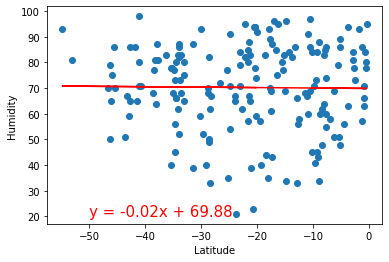

<Figure size 432x288 with 0 Axes>

In [79]:
x_values = SouthernHem_df["Lat"]
y_values = SouthernHem_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

plt.savefig("../output_data/Southern Hemisphere Humidity(%) vs Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 2.4741934058345217e-10


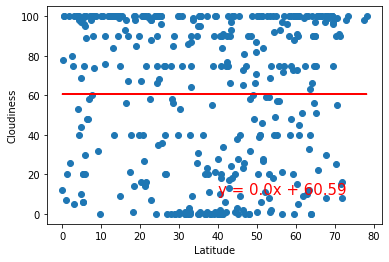

<Figure size 432x288 with 0 Axes>

In [80]:
x_values = NorthernHem_df["Lat"]
y_values = NorthernHem_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

plt.savefig("../output_data/Northern Hemisphere Cloudiness(%) vs Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005508637016596258


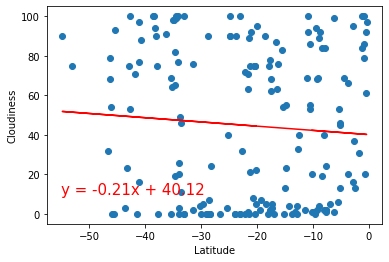

<Figure size 432x288 with 0 Axes>

In [84]:
x_values = SouthernHem_df["Lat"]
y_values = SouthernHem_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-55,10))

plt.savefig("../output_data/Southern Hemisphere Cloudiness(%) vs Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.002335973022812097


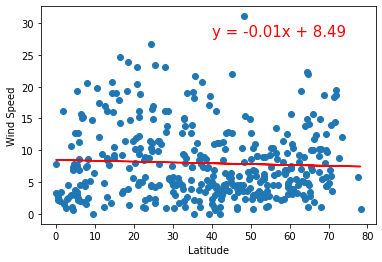

<Figure size 432x288 with 0 Axes>

In [86]:
x_values = NorthernHem_df["Lat"]
y_values = NorthernHem_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,28))

plt.savefig("../output_data/Northern Hemisphere Wind Speed (mph) vs Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.055883361591483306


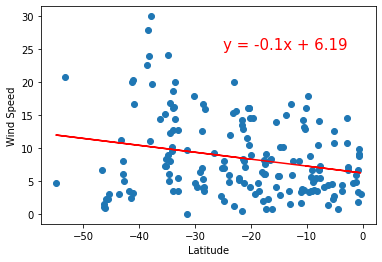

<Figure size 432x288 with 0 Axes>

In [89]:
x_values = SouthernHem_df["Lat"]
y_values = SouthernHem_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-25, 25))

plt.savefig("../output_data/Southern Hemisphere Wind Speed (mph) vs Latitude Linear Regression.png")